## System of Recommendation 

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score
import pandas as pd
import numpy as np

### K-Mean Model

In [46]:
data=pd.read_csv('Final_Data_Career.csv')
df_km=data.copy()
df_km = df_km[df_km['Title'] != 'No Title']
df_km = df_km[df_km['Company'] != 'No Name']
df_km.tail()

,Title,Company,Type,Location,Salary,Level,Industry_re,Experience_re,Description_re,Requirement _re,Benefit_re
4738,[Dist 3] AI Engineer_Computer Vision_upto 2000 usd,Company Limited Wacontre,Permanent,Ho Chi Minh,"1,000 - 2,000 USD",Experienced (Non - Manager),IT-Software,2-5Years,Create Demo App to show the output of research on mobile / web R & amp; D / PoC / Report topics of the client or company Support integrating AI Model for Dev team Focus on Computer Vision Sound Recognition Data Analysis,"Ability to develop models by trial and error AI to Achieve the purpose Ability to print models AI implements web / mobile apps Ability to Discuss & amp; report in English Over 1 year as AI Engineer Proficient in Python C / C ++ programming language Salary up to $ 2,000 Working Time Mon Fri 8 30 ~ 17 35 (Lunch 11 55 ~ 13 00) Other Benefits + The 13th salary company HR trip and other attractive benefits + Social insurance health yearly checking & amp; Annual holidays good 3 WORKING ENVIRONMENT + International & amp; friendly working environment with professional Japanese / UK staff open minded Colleagues có make you more creative + Tech seminars JP / EN classes are sponsored in the company + Many opportunities for professional and personal growth by being approached by những technologies in projects + fair evaluation based Delivery (salary Increased maximum of 300% as company record) + Sports Activities (football badminton) is sponsored by a company to stay healthy 4 Become CHANCE tO HIGH VALUE ENGINEER + You will be trained for sub language and skills (you can master two or more at Least technical skills ) + You will be trained for technologies trend + You have many to join the technical seminar Chances inside & amp; outside the company + You will be a high value designer with a stable career with dynamic promotion & amp; job opportunities </ p",None
4739,Senior Python Engineer,TECHNOLOGY CORPORATION SOTA TEK,Permanent,Ha Noi,Competitive,Experienced (Non - Manager),CustomerService,3-5Years,,Must have · Bachelor degree or above in Computer Science or related majors with 5 years of similar experience in Python on developing commercial projects · Familiar with common used Algorithms and data structures cũng with design patterns and knowledge to apply added in your daily programming · Familiar with the architecture and practice of the distributed system · Passionate about software engineering energetic pursuit with high software quality and keep the pace with the cutting edge technology and best practices · Familiar with Django or other web frameworks and know well about the HTTP protocol and the essential protocols in computer networking suits · Familiar with the database with good experience in using and tuning databases like MySQL / MongoDB / Redis etc · Understand frontend technologies like Web iOS Android RN etc · Familiar with Git and the conventions of committing / collaboration; Know Git; Flow like Git ; · Familiar with Agile practices Methodology and its flow and practice; Good communication skills and learning abilities ; · Knowledge about Machine Learning; Has experience with Deep Learning frameworks like TensorFlow or PyTorch · Knowledge of virtualization and Containerization technology Nice to have · Experiences with the Large scale Distributed system is a plus · Familiar with Docker / K8S is a big plus · Contribution to the open source projects is a big plus · Good English skills is a big plus </ p,"Laptop , Insurance , Travel , Allowances , Uniform , Incentive bonus , Healthcare , Training Scheme , Salary review , Business Expense , Seniority Allowance , Annual Leave , Sport Club"
4740,AI Fullstack - Senior / Leader,JAC Recruitment Ltd Vietnam,Permanent,Ho Chi Minh,27 Mil - 40 Mil VND,Experienced (Non - Manager),IT-Software,3-8Years,"COMPANY OVERVIEWThe company's history and legacy Started in 2016 as a subsidiary company of the Group The company works to create Valuable mobile content as well as services delivered through m

In [6]:
df_km_train=df_km[['Title','Industry_re','Experience_re','Location','Level']]

In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot = onehot.fit(df_km_train)
df_km_onehot = onehot.transform(df_km_train).toarray()
df_km_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df_km_onehot.shape

(4423, 3393)

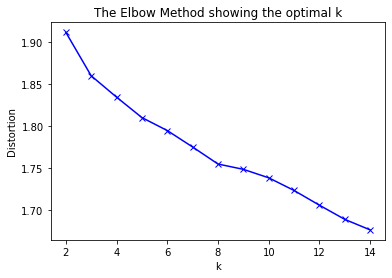

In [12]:
# Trains a k-means model
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sb
import matplotlib.pyplot as plt

distortions =[]
K= range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_km_onehot)
    distortions.append(sum(np.min(cdist(df_km_onehot, kmeanModel.cluster_centers_,
                                       'euclidean'),axis=1))/df_km_onehot.shape[0])    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [13]:
# Comment: choose k =8
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_km_onehot)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[ 1.08420217e-18  1.41743444e-03  5.42101086e-19 ...  7.08717222e-04
   6.24500451e-16  4.25230333e-03]
 [-1.02999206e-18 -1.02999206e-18 -5.14996032e-19 ... -4.11996826e-18
   1.00000000e+00 -2.60208521e-18]
 [ 2.09863589e-03 -1.84314369e-18 -9.21571847e-19 ...  3.14795383e-03
   3.05311332e-16  1.04931794e-03]
 ...
 [ 1.08420217e-19  1.08420217e-19  5.42101086e-20 ...  4.33680869e-19
   4.16333634e-17 -6.50521303e-19]
 [-9.21571847e-19 -9.21571847e-19 -4.60785923e-19 ...  2.19298246e-03
  -2.49800181e-16 -2.60208521e-18]
 [-5.42101086e-19 -5.42101086e-19 -2.71050543e-19 ... -2.16840434e-18
  -2.35922393e-16 -2.60208521e-18]]
[2 3 0 ... 0 6 5]


In [16]:
# Testing data: 
job_test= np.array([['AI Engineer','IT-Software','2-Years','Hai Duong','Entry Level']])

In [17]:
df_km_onehot_testing = onehot.transform(job_test)
df_km_onehot_testing

<1x3393 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [18]:
pred = kmeans.predict(df_km_onehot_testing)
pred


array([0])

In [19]:
df_km_train['Group'] = pd.Series(labels)
df_km_train.head()

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Industry_re,Experience_re,Location,Level,Group
0,AI Engineer,IT-Software,2-5Years,Ha Noi,Experienced (Non - Manager),2.0
1,57 528 - AI Engineer,IT-Software,Experienced (Non - Manager),Ha Noi,21/03/2021,3.0
2,57 980 - AI Engineer,IT-Software,1-Years,Ho Chi Minh,Experienced (Non - Manager),0.0
3,AI Engineer,IT-Software,1-Years,Ha Noi,Experienced (Non - Manager),2.0
4,AI Engineer,IT-Software,2-4Years,Ha Noi,Experienced (Non - Manager),2.0


In [20]:
df_km_train = df_km_train[df_km_train['Group'] ==0]
df_km_train.head()

,Title,Industry_re,Experience_re,Location,Level,Group
2,57 980 - AI Engineer,IT-Software,1-Years,Ho Chi Minh,Experienced (Non - Manager),0.0
8,AI Fullstack - Senior / Leader,IT-Software,3-8Years,Ho Chi Minh,Experienced (Non - Manager),0.0
10,[D.3 / HCM] AI Engineer,IT-Software,1-5Years,Ho Chi Minh,Experienced (Non - Manager),0.0
11,[HCM] PROGRAMMING AI ~ 2000 USD,IT-Software,1-3Years,Ho Chi Minh,Experienced (Non - Manager),0.0
12,[HCM] AI Engineer_Upto 2000 usd,Electrical/Electronics,1-5Years,Ho Chi Minh,Experienced (Non - Manager),0.0
